In [1]:
import IPython
from pvrecorder import PvRecorder
import wave
import struct
import time
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
recorder = PvRecorder(device_index=0, frame_length=512)
sound = []

recorder.start()
print('recording')
t_0 = time.time()
while time.time()-t_0<4:
    frame = recorder.read()
    sound.extend(frame)
        # Do something ...
recorder.stop()
recorder.delete()
fs = 16000


recording


In [3]:
path = 'test.wav' 
with wave.open(path, 'w') as f:
                    f.setparams((1, 2, fs, 512, "NONE", "NONE"))
                    f.writeframes(struct.pack("h" * len(sound), *sound))

In [5]:
data = np.array(sound).astype(np.int16)
for i in range(100):
    fft = np.fft.fft(data)*0.1
    data = np.fft.ifft(fft)
    data = ((2**(16-4)) * data/data.max()).astype(np.int16)
   

/var/folders/q8/9dhs6y4d21s87vxtnwqflq5m0000gn/T/ipykernel_49840/534606777.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  data = ((2**(16-4)) * data/data.max()).astype(np.int16)


In [6]:
data = np.array(sound).astype(np.int16)
fft = np.fft.fft(data)
fft

array([-16353862.             +0.j        ,
         -122313.97345429 +19176.02338202j,
          204219.97986525-515933.19799668j, ...,
         -176563.18051479+212809.76796949j,
          204219.97986525+515933.19799668j,
         -122313.97345429 -19176.02338202j])

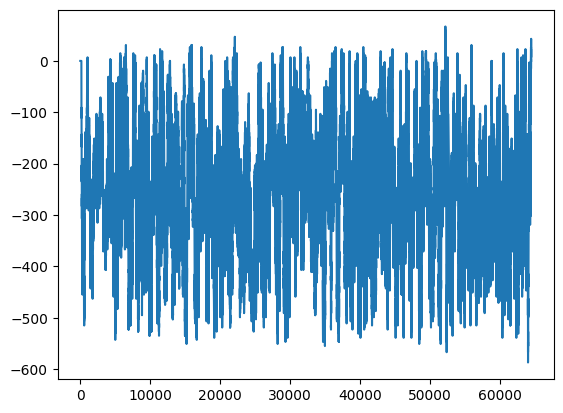

In [7]:
plt.plot(data)

/Users/fridadesigley/.pyenv/versions/3.9.7/envs/pico/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


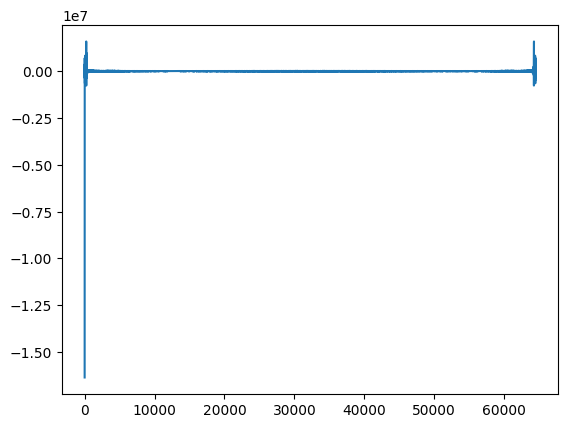

In [8]:
plt.plot(fft)
  

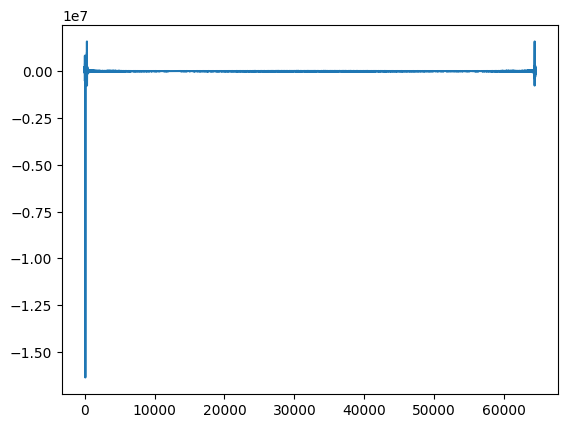

In [9]:
roll = np.roll(fft,100)
plt.plot(roll)

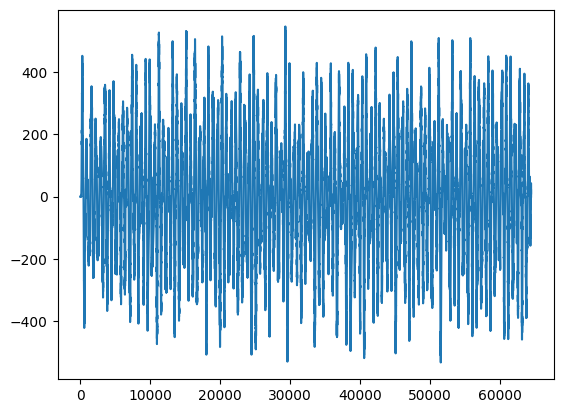

In [10]:
ifft = np.fft.ifft(roll)
plt.plot(ifft)

In [11]:
fft

array([-16353862.             +0.j        ,
         -122313.97345429 +19176.02338202j,
          204219.97986525-515933.19799668j, ...,
         -176563.18051479+212809.76796949j,
          204219.97986525+515933.19799668j,
         -122313.97345429 -19176.02338202j])

In [12]:
roll = np.roll(fft,10)
data = np.fft.ifft(roll)
data = ((2**(16-4)) * data/data.max()).astype(np.int16)

/var/folders/q8/9dhs6y4d21s87vxtnwqflq5m0000gn/T/ipykernel_49840/3895190541.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  data = ((2**(16-4)) * data/data.max()).astype(np.int16)


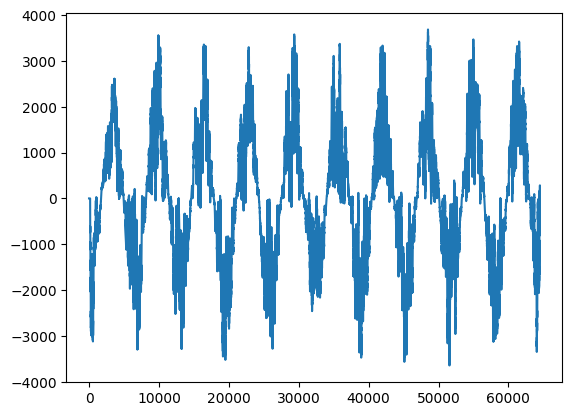

In [19]:
plt.plot(data*0.9)

In [13]:
!env | grep env

PYENV_ROOT=/Users/fridadesigley/.pyenv
VIRTUAL_ENV=/Users/fridadesigley/.pyenv/versions/3.9.7/envs/pico
PYENV_VIRTUAL_ENV=/Users/fridadesigley/.pyenv/versions/3.9.7/envs/pico
PATH=/Users/fridadesigley/.pyenv/versions/pico/bin:/usr/local/opt/pyenv/libexec:/usr/local/opt/pyenv/plugins/python-build/bin:/Users/fridadesigley/google-cloud-sdk/bin:/opt/homebrew/bin:/Users/fridadesigley/.pyenv/shims:/usr/local/Cellar/pyenv-virtualenv/1.1.5/shims:/usr/local/bin:/usr/local/sbin:/Users/fridadesigley/.pyenv86/bin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/usr/local/sbin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin
PYENV_HOOK_PATH=/Users/fridadesigley/.pyenv/pyenv.d:/usr/local/opt/pyenv/pyenv.d:/usr/local/etc/pyenv.d:/etc/pyenv.d:/usr/lib/pyenv/hooks:/Users/fridadesigley/.pyenv/plugins/pyenv-alias/etc/pyenv.d
_=/usr/bin/env


In [26]:
from scipy.io.wavfile import read
import wave
import struct
import ipywidgets as widgets
import IPython
from pvrecorder import PvRecorder
import wave
import struct
import time
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [108]:
class Response:
    def __init__(self,frame):
        self.frame_length=frame
        self.path =  './test.wav'
        self.t_delta=1
        self.fs = 16000
        self.root = Path('./')
        
    def set_time(self,delta_sec:int):
        self.t_delta=delta_sec
        
    def get_classes(self,sound_classes:tuple[str,str]):
        self.dir = self.root/'data'
        
        self.classes={sound:{'class':idx,'count':len(list((self.dir/sound).iterdir()))} for idx,sound in enumerate(sound_classes)}
        print(self.classes)
        self.set_widgets()
            
        
    def set_widgets(self):
        
        actions=[
            widgets.Button(description=f'record {name}') for name,entry in self.classes.items()]
        for act in actions:
            act.on_click(self.record)
            
            
        save = widgets.Button(description='save \U0001F4BE')
        play = widgets.Button(description='play ▶️')
        
        delete = widgets.Button(description='delete \U0000274C')
        save.on_click(self.save)
        play.on_click(self.play)
        delete.on_click(self.drop_recording)
        self.out = widgets.Output()
        actions+=[play,save,delete,self.out]
        acts = tuple(actions)
        self.vbox=widgets.VBox(children=acts)
        display(self.vbox)
        
    def record(self,button:widgets.Button):
        with self.out:
            key = button.description.split(' ')[1]
            self.state = key
            self.classes[key]['count']+=1
            self.classes[key][f'record {self.classes[key]["count"]}']=np.array([])
#             print(dir(self.out))
#             print(self.out._Output__counter)
            self.recorder = PvRecorder(device_index=0, frame_length=self.frame_length)
            self.recorder.start()
            t_0 = time.time()
            record = np.array([]).astype(np.int16)
            while time.time()-t_0<self.t_delta:
                frame = self.recorder.read()
                record = np.append(record,np.array(frame)).astype(np.int16)
            self.recorder.stop()
            self.recorder.delete()
            self.classes[key][f'record {self.classes[key]["count"]}']=record
            

    def save(self,_):
        path = self.root/'data'
        if not path.exists():
            path.mkdir(exist_ok=True)
        with self.out:
            for state in self.classes:
                class_dir = path/state
                if not class_dir.exists():
                    class_dir.mkdir(exist_ok=True)
                for key in self.classes[state]:
                    if 'record' in key:
                        rec = self.classes[state][key]
                        fid = class_dir/f'{state}_{key}.wav'
                        with wave.open(str(fid), 'w') as f:
                            f.setparams((1, 2, self.fs, 512, "NONE", "NONE"))
                            f.writeframes(struct.pack("h" * len(rec), *rec))
        
    def play(self,_):
        try:
            count = self.classes[self.state]['count']
            print(self.classes[self.state][f'record {count}'])
            for key in self.classes[self.state]:
                if 'record' in key:
                    sd.play(self.classes[self.state][key], self.fs)
                    sd.wait()
        except(KeyError,AttributeError):
            print('no recordings')

    def drop_recording(self,_):
        try:
            if self.classes[self.state]['count']!=0:
                self.classes[self.state].popitem()
                self.classes[self.state]['count']-=1
        except(KeyError,AttributeError):
            print('no recordings')

In [102]:
sample = Response(frame=512)
sample.set_time(delta_sec=1)
sample.get_classes(('yes','no','background'))


NameError: name 'Response' is not defined

In [49]:
import wave
import numpy as np
import matplotlib.pyplot as plt
def read_wav(fid:str):
    # Read file to get buffer                                                                                               
    ifile = wave.open(fid)
    samples = ifile.getnframes()
    audio = ifile.readframes(samples)

    # Convert buffer to float32 using NumPy                                                                                 
    audio_as_np_int16 = np.frombuffer(audio, dtype=np.int16)
    return audio_as_np_int16

In [50]:
# !mkdir datasets
# !wget 'https://github.com/karoldvl/ESC-50/archive/master.zip' -P ~/datasets/ 
# !unzip -q ~/datasets/master.zip -d ~/datasets/

In [51]:
import pandas as pd
esc50_csv = '~/datasets/ESC-50-master/meta/esc50.csv'
base_data_path = '~/datasets/ESC-50-master/audio/'

df = pd.read_csv(esc50_csv)
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [52]:
!pip install tensorflow-macos

In [53]:
import tensorflow as tf
import tensorflow_io as tfio

In [61]:
sample_rate = 16000
chans = 1
sound = read_wav('./data/yes/yes_record 3.wav')
sound = sound.astype(np.float32, order='F') / 32768.0


In [103]:
file_contents = tf.io.read_file('./data/yes/yes_record 5.wav')
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=chans)
squeeze_wav = tf.squeeze(wav, axis=-1)
spect = tf.signal.stft(squeeze_wav, frame_length=512, frame_step=128)


In [104]:
import scipy

In [105]:
!pip install cmsisdsp

In [112]:
import cmsisdsp
from numpy import pi as PI

window_size = 512
step_size = 64

hanning_window_f32 = np.zeros(window_size)
for i in range(window_size):
  hanning_window_f32[i] = 0.5 * (1 - cmsisdsp.arm_cos_f32(2 * PI * i / window_size ))
hanning_window_q15 = cmsisdsp.arm_float_to_q15(hanning_window_f32)
rfftq15 = cmsisdsp.arm_rfft_instance_q15()
status = cmsisdsp.arm_rfft_init_q15(rfftq15, window_size, 0, 1)

def get_arm_spectrogram(waveform):
  num_frames = int(1 + (len(waveform) - window_size) // step_size)
  fft_size = int(window_size // 2 + 1)
  # Convert the audio to q15
  waveform_q15 = cmsisdsp.arm_float_to_q15(waveform)
  # Create empty spectrogram array
  spectrogram_q15 = np.empty((num_frames, fft_size), dtype = np.int16)
  start_index = 0
  for index in range(num_frames):
    # Take the window from the waveform.
    window = waveform_q15[start_index:start_index + window_size]
    # Apply the Hanning Window.
    window = cmsisdsp.arm_mult_q15(window, hanning_window_q15)
    # Calculate the FFT, shift by 7 according to docs
    window = cmsisdsp.arm_rfft_q15(rfftq15, window)
    # Take the absolute value of the FFT and add to the Spectrogram.
    spectrogram_q15[index] = cmsisdsp.arm_cmplx_mag_q15(window)[:fft_size]
    # Increase the start index of the window by the overlap amount.
    start_index += step_size
  # Convert to numpy output ready for keras
  return cmsisdsp.arm_q15_to_float(spectrogram_q15).reshape(num_frames,fft_size) * 512

In [113]:
spct = get_arm_spectrogram(wav)

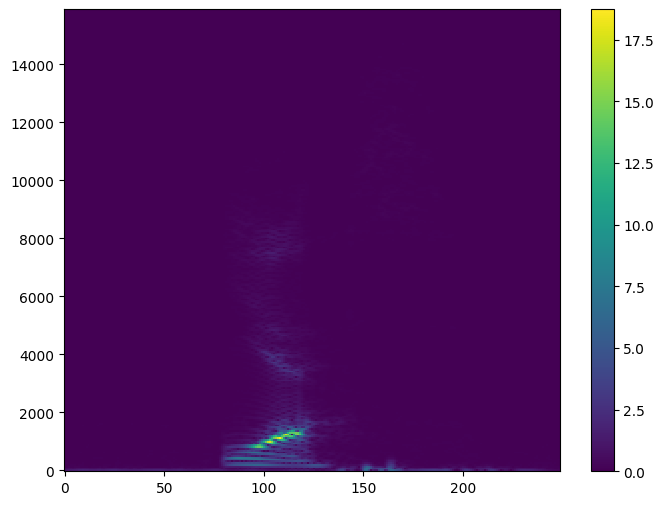

In [114]:

def plot_spectrogram(spectrogram,sample_rate, vmax=None):
  transposed_spectrogram = tf.transpose(spectrogram)

  fig = plt.figure(figsize=(8,6))
  height = transposed_spectrogram.shape[0]
  X = np.arange(transposed_spectrogram.shape[1])
  Y = np.arange(height * int(sample_rate / 256), step=int(sample_rate / 256))

  im = plt.pcolormesh(X, Y, tf.transpose(spectrogram), vmax=vmax)

  fig.colorbar(im)
  plt.show()


plot_spectrogram(spct,16000)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.1 MB/s eta 0:00:0000:010:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 34.2 MB/s eta 0:00:0000:0100:01
  Created wheel for jax: filename=jax-0.4.1-py3-none-any.whl size=1332478 sha256=010f342fd2ace9993b41942b4f3c8b4bf3eb84e0bbe96f2c163e8fed40e3593b
  Stored in directory: /Users/fridadesigley/Library/Caches/pip/wheels/50/a9/f3/86082312fd44e12e52b1b7744c37ed1d02e64deefdc735c77b
Successfully built jax


In [ ]:
import jax.random